# Machine Learning in Finance
- Dataset: Crypto currency continuous time series data set 
- Source: https://www.kaggle.com/jessevent/all-crypto-currencies/data
- Time series: 28 April 2013 - 22 Feb 2018

## 1. Development of trading strategy [Data pre-processing]
Leveraging data analysis and visualisation with open source python libraries

**1.1. Data import**

In [2]:
import pandas as pd

In [3]:
crypto = pd.read_csv('crypto-markets.csv')

**1.2 High level Analysis of data content**

In [4]:
crypto.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


- **Spread** is the $USD difference between the high and low values for the day.
<br> daily spread provides information on day trading market potential
- **Close ratio** is the daily close rate, min-maxed with the high and low values for the day.
<br>close_ratio = (close price - low price) / (high price - low price)
<br>close ratio gives me a percentile normalised throughout the dataset [0;1] - "Feature Scaling"
<br>close ratio provides information on where within the daily volatility the price closed

In [5]:
crypto.shape #(rows, columns)

(702166, 13)

In [6]:
import numpy as np

In [7]:
unique_currencies = np.unique(crypto['slug'])
print(len(unique_currencies))
print(unique_currencies)

1516
['0x' '1337coin' '2give' ... 'zrcoin' 'zsecoin' 'zurcoin']


In [8]:
crypto.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,702166.000000,7.021660e+05,7.021660e+05,7.021660e+05,7.021660e+05,7.021660e+05,7.021660e+05,7.021660e+05,7.021660e+05
mean,734.561943,2.696117e+02,3.284954e+02,2.210024e+02,2.694796e+02,5.544493e+06,1.202024e+08,-inf,1.074927e+02
std,411.195482,1.219343e+04,1.558344e+04,9.686538e+03,1.217104e+04,1.673788e+08,3.074096e+09,NaN,7.207118e+03
min,1.000000,2.500000e-09,3.200000e-09,9.200000e-14,0.000000e+00,0.000000e+00,0.000000e+00,-inf,0.000000e+00
25%,397.000000,5.280000e-04,6.210000e-04,4.550000e-04,5.290000e-04,2.700000e+01,7.095000e+03,1.429000e-01,0.000000e+00
50%,746.000000,8.753000e-03,1.016400e-02,7.630000e-03,8.768000e-03,5.030000e+02,9.402450e+04,4.331000e-01,0.000000e+00
75%,1032.000000,1.333997e-01,1.523455e-01,1.170855e-01,1.336785e-01,1.325400e+04,1.326118e+06,7.703000e-01,3.000000e-02
max,1516.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.261410e+11,1.000000e+00,1.770563e+06


In [9]:
crypto.dtypes

slug            object
symbol          object
name            object
date            object
ranknow          int64
open           float64
high           float64
low            float64
close          float64
volume           int64
market           int64
close_ratio    float64
spread         float64
dtype: object

In [10]:
crypto.tail()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
702161,ocow,OCOW,OCOW,2018-01-02,1516,0.000014,0.000030,0.000013,0.000015,733,0,0.1176,0.0
702162,ocow,OCOW,OCOW,2018-01-03,1516,0.000015,0.000031,0.000015,0.000015,1200,0,0.0000,0.0
702163,ocow,OCOW,OCOW,2018-01-04,1516,0.000015,0.000031,0.000015,0.000030,5375,0,0.9375,0.0
702164,ocow,OCOW,OCOW,2018-01-05,1516,0.000030,0.000032,0.000016,0.000017,1922,0,0.0625,0.0
702165,ocow,OCOW,OCOW,2018-01-06,1516,0.000017,0.000017,0.000016,0.000017,1884,0,1.0000,0.0


**1.4. Data Cleaning**

- Data cleaning by minimizing scope of 1516 currencies to number one traded currencies - Bitcoin, ensuring data quality and liquidity for day trading by creating seperate Bitcoin data frame
- Add Column for Open Ratio
- Time Series related Data Customisation: Change date datatype from object to datetime to have computer interpret dates as a time series

**Minimize scope of data**

In [11]:
Bitcoin_df = crypto [crypto.name == "Bitcoin"]
Bitcoin_df.shape

(1761, 13)

**Add a new column** 

In [12]:
Bitcoin_df ['open_ratio'] = (Bitcoin_df['open'] - Bitcoin_df['low']) / (Bitcoin_df['high'] - Bitcoin_df['low'])
Bitcoin_df.head()

/Users/carolinahoffmann-becking/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,open_ratio
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88,0.824742
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49,0.032617
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88,0.772516
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17,0.972334
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32,0.723289


In [13]:
Bitcoin_df.shape

(1761, 14)

**Incorporate time series features with datetime**

In [15]:
Bitcoin_df["date'] = pd.to_datetime(Bitcoin_df["date"], dayfirst = True)
Bitcoin_df.index = Bitcoin_df['date']
Bitcoin_df.head()

/Users/carolinahoffmann-becking/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,open_ratio
date,,,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88,0.824742
2013-04-29,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49,0.032617
2013-04-30,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88,0.772516
2013-05-01,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17,0.972334
2013-05-02,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32,0.723289


In [16]:
Bitcoin_df.dtypes

slug                   object
symbol                 object
name                   object
date           datetime64[ns]
ranknow                 int64
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
market                  int64
close_ratio           float64
spread                float64
open_ratio            float64
dtype: object

In [17]:
Bitcoin_df['2017']
# By doing this, we gain a lot of functionality in pandas. What if you want to check all values in a certain year?

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,open_ratio
date,,,,,,,,,,,,,,
2017-01-01,bitcoin,BTC,Bitcoin,2017-01-01,1,963.66,1003.08,958.70,998.33,147775000,15491200000,0.8930,44.38,0.111762
2017-01-02,bitcoin,BTC,Bitcoin,2017-01-02,1,998.62,1031.39,996.70,1021.75,222185000,16055100000,0.7221,34.69,0.055347
2017-01-03,bitcoin,BTC,Bitcoin,2017-01-03,1,1021.60,1044.08,1021.60,1043.84,185168000,16426600000,0.9893,22.48,0.000000
2017-01-04,bitcoin,BTC,Bitcoin,2017-01-04,1,1044.40,1159.42,1044.40,1154.73,344946000,16795400000,0.9592,115.02,0.000000
2017-01-05,bitcoin,BTC,Bitcoin,2017-01-05,1,1156.73,1191.10,910.42,1013.38,510199000,18604000000,0.3668,280.68,0.877547
2017-01-06,bitcoin,BTC,Bitcoin,2017-01-06,1,1014.24,1046.81,883.94,902.20,351876000,16314100000,0.1121,162.87,0.800025
2017-01-07,bitcoin,BTC,Bitcoin,2017-01-07,1,903.49,908.59,823.56,908.59,279550000,14534400000,1.0000,85.03,0.940021
2017-01-08,bitcoin,BTC,Bitcoin,2017-01-08,1,908.17,942.72,887.25,911.20,158715000,14611400000,0.4318,55.47,0.377141
2017-01-09,bitcoin,BTC,Bitcoin,2017-01-09,1,913.24,913.69,879.81,902.83,141877000,14694900000,0.6795,33.88,0.986718


**1.5 Data Analysis to derive insights for trading strategy **

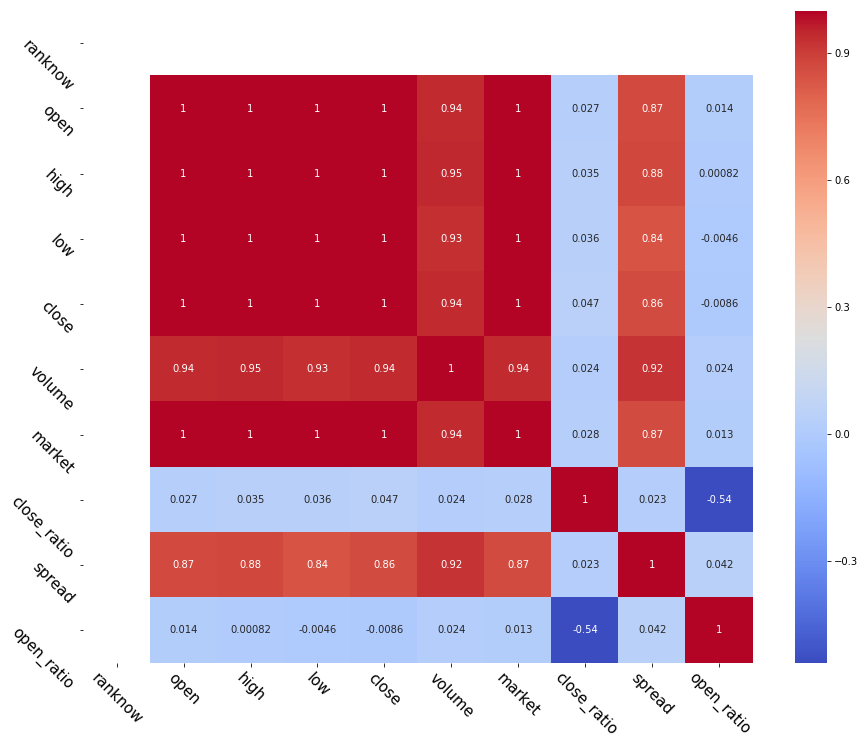

In [164]:
import seaborn as sns
correlations_map= Bitcoin_df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(correlations_map,annot=True,cbar=True,cmap="coolwarm")
plt.xticks(rotation=315,fontsize=15)
plt.yticks(rotation=315, fontsize=15)
plt.show()

In [14]:
Bitcoin_df.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread,open_ratio
count,1761.0,1761.000000,1761.000000,1761.000000,1761.000000,1.761000e+03,1.761000e+03,1761.000000,1761.000000,1760.000000
mean,1.0,1485.191857,1542.602413,1423.396559,1490.973947,8.627147e+08,2.391001e+10,0.545899,119.205855,0.473263
std,0.0,2959.024244,3101.024780,2788.441525,2966.544907,2.802911e+09,4.985893e+10,0.297931,363.362138,0.352948
min,1.0,68.500000,74.560000,65.530000,68.430000,0.000000e+00,7.792550e+08,0.000000,0.000000,0.000000
25%,1.0,274.770000,279.930000,268.800000,274.900000,1.640000e+07,3.890430e+09,0.286700,6.330000,0.119610
50%,1.0,481.810000,495.340000,472.700000,483.340000,4.382500e+07,6.842470e+09,0.570000,14.560000,0.449506
75%,1.0,871.390000,901.940000,834.150000,872.600000,1.324290e+08,1.251170e+10,0.811900,49.050000,0.821021
max,1.0,19475.800000,20089.000000,18974.100000,19497.400000,2.384090e+10,3.261410e+11,1.000000,4110.400000,1.000000


## Implications for trading strategy?

- **Bitcoin** close ratio mean 0.55; open ratio mean 0.47
- Recomendation: **Buy at Open and sell at Close Pricing**

**1.5 Data Visualisation**

In [18]:
import matplotlib.pyplot as plt

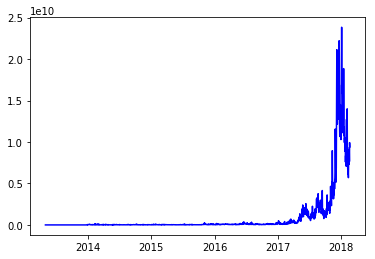

In [19]:
y3 = Bitcoin_df['volume']
x = Bitcoin_df['date']
plt.plot(x,y3,'b')
plt.show()

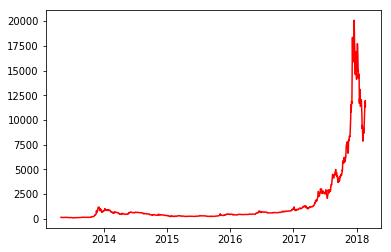

In [20]:
y4 = Bitcoin_df['high']
x = Bitcoin_df['date']
plt.plot(x,y4,'r')
plt.show()

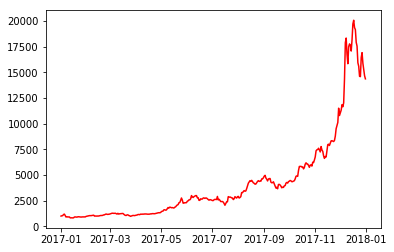

In [21]:
Bitcoin_2017 = Bitcoin_df['2017']
y1 = Bitcoin_2017['high']
x = Bitcoin_2017['date']
plt.plot(x,y1,'r')
plt.show()

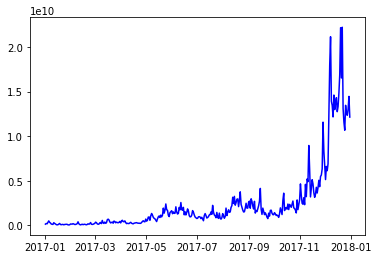

In [22]:
y2 = Bitcoin_2017['volume']
x = Bitcoin_2017['date']
plt.plot(x,y2,'b')
plt.show()

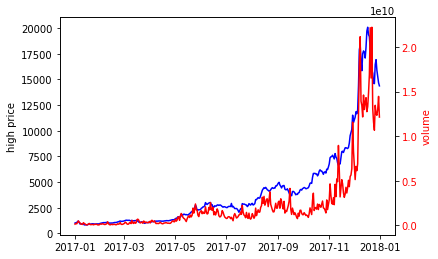

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, y1,'b')
ax1.set_ylabel('high price')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r-')
ax2.set_ylabel('volume', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

**Data normalisation for comparison**

In [24]:
from sklearn.preprocessing import MinMaxScaler #sklearn used to preprocess data - normalise

In [25]:
data = Bitcoin_2017[['high','volume']]
data

,high,volume
date,,
2017-01-01,1003.08,147775000
2017-01-02,1031.39,222185000
2017-01-03,1044.08,185168000
2017-01-04,1159.42,344946000
2017-01-05,1191.10,510199000
2017-01-06,1046.81,351876000
2017-01-07,908.59,279550000
2017-01-08,942.72,158715000
2017-01-09,913.69,141877000


In [26]:
scaler = MinMaxScaler()
print(scaler.fit(data))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [27]:
print(scaler.data_max_)

[2.0089e+04 2.2198e+10]


In [28]:
df_new = scaler.transform(data)   #in one step scaler.fit_transform(data)
df_new = pd.DataFrame(df_new)
df_new.columns = ['high','volume']
df_new

,high,volume
0,0.009331,0.003927
1,0.010801,0.007288
2,0.011459,0.005616
3,0.017446,0.012833
4,0.019090,0.020298
5,0.011601,0.013146
6,0.004427,0.009879
7,0.006198,0.004421
8,0.004691,0.003660
9,0.004752,0.002483


In [29]:
y1_norm = df_new['high']
y2_norm = df_new['volume']
x = Bitcoin_2017['date']

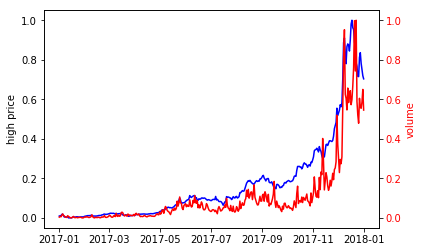

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, y1_norm,'b')
ax1.set_ylabel('high price')

ax2 = ax1.twinx()
ax2.plot(x, y2_norm, 'r-')
ax2.set_ylabel('volume', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

### Implications for trading strategy?

Assumptions
- High trading volume / sufficient market liquidity for bitcoins day trading
- Simplified hypothesis on no transaction costs
- Generally long term bullish view on bitcoin / crypto 

**Investment approach: Predict close ratio of day+1 based on change in volume over past 3 days**

If close ratio of tomorrow predicted at > 0.5 
- recommendation to buy at open price the next day t+1
- and sell at day end <br>

If close ratio of tomorrow turns out to be < 0.5 
- hold position due to long term bullish position for bitcoin

# 2. Development of predictive model using regression algorithm
**Turning Time Series into Non Time Series Problem using pandas library shift function**
<br>A common operation on time-series data is to shift or "lag" the values back and forward in time, such as to calculate percentage change from sample to sample. The pandas method for this is .shift() , which will shift the values in the index by a specified number of units of the index's period.

In [31]:
Bitcoin_2017

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,open_ratio
date,,,,,,,,,,,,,,
2017-01-01,bitcoin,BTC,Bitcoin,2017-01-01,1,963.66,1003.08,958.70,998.33,147775000,15491200000,0.8930,44.38,0.111762
2017-01-02,bitcoin,BTC,Bitcoin,2017-01-02,1,998.62,1031.39,996.70,1021.75,222185000,16055100000,0.7221,34.69,0.055347
2017-01-03,bitcoin,BTC,Bitcoin,2017-01-03,1,1021.60,1044.08,1021.60,1043.84,185168000,16426600000,0.9893,22.48,0.000000
2017-01-04,bitcoin,BTC,Bitcoin,2017-01-04,1,1044.40,1159.42,1044.40,1154.73,344946000,16795400000,0.9592,115.02,0.000000
2017-01-05,bitcoin,BTC,Bitcoin,2017-01-05,1,1156.73,1191.10,910.42,1013.38,510199000,18604000000,0.3668,280.68,0.877547
2017-01-06,bitcoin,BTC,Bitcoin,2017-01-06,1,1014.24,1046.81,883.94,902.20,351876000,16314100000,0.1121,162.87,0.800025
2017-01-07,bitcoin,BTC,Bitcoin,2017-01-07,1,903.49,908.59,823.56,908.59,279550000,14534400000,1.0000,85.03,0.940021
2017-01-08,bitcoin,BTC,Bitcoin,2017-01-08,1,908.17,942.72,887.25,911.20,158715000,14611400000,0.4318,55.47,0.377141
2017-01-09,bitcoin,BTC,Bitcoin,2017-01-09,1,913.24,913.69,879.81,902.83,141877000,14694900000,0.6795,33.88,0.986718


In [132]:
Bitcoin_2017['3_day_volume_shifted'] = Bitcoin_2017['volume'].shift(3)
Bitcoin_2017['3_day_volume_change'] = ((Bitcoin_2017['volume'] - Bitcoin_2017['3_day_volume_shifted'])*100/Bitcoin_2017['3_day_volume_shifted'])#y2-y1/y1
Bitcoin_2017 = Bitcoin_2017.iloc[3:]
Bitcoin_2017

/Users/carolinahoffmann-becking/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/carolinahoffmann-becking/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,open_ratio,3_day_volume_shifted,3_day_volume_change
date,,,,,,,,,,,,,,,,
2017-01-07,bitcoin,BTC,Bitcoin,2017-01-07,1,903.49,908.59,823.56,908.59,279550000,14534400000,1.0000,85.03,0.940021,3.449460e+08,-18.958330
2017-01-08,bitcoin,BTC,Bitcoin,2017-01-08,1,908.17,942.72,887.25,911.20,158715000,14611400000,0.4318,55.47,0.377141,5.101990e+08,-68.891550
2017-01-09,bitcoin,BTC,Bitcoin,2017-01-09,1,913.24,913.69,879.81,902.83,141877000,14694900000,0.6795,33.88,0.986718,3.518760e+08,-59.679830
2017-01-10,bitcoin,BTC,Bitcoin,2017-01-10,1,902.44,914.87,901.06,907.68,115808000,14522600000,0.4794,13.81,0.099928,2.795500e+08,-58.573422
2017-01-11,bitcoin,BTC,Bitcoin,2017-01-11,1,908.12,919.45,762.76,777.76,310929000,14615700000,0.0957,156.69,0.927692,1.587150e+08,95.903979
2017-01-12,bitcoin,BTC,Bitcoin,2017-01-12,1,775.18,826.25,755.76,804.83,222326000,12477600000,0.6961,70.49,0.275500,1.418770e+08,56.703342
2017-01-13,bitcoin,BTC,Bitcoin,2017-01-13,1,803.74,829.00,780.00,823.98,168968000,12939100000,0.8976,49.00,0.484490,1.158080e+08,45.903565
2017-01-14,bitcoin,BTC,Bitcoin,2017-01-14,1,825.14,835.09,812.46,818.41,93063300,13285200000,0.2629,22.63,0.560318,3.109290e+08,-70.069276
2017-01-15,bitcoin,BTC,Bitcoin,2017-01-15,1,818.14,823.31,812.87,821.80,71013600,13174300000,0.8554,10.44,0.504789,2.223260e+08,-68.058797


**Statistical stationarity: Assumption for applying Machine Learning Time Series techiniques**

- **Constant mean**: This means that the mean of the time series should not be a function of time itself, but should be constant
- **Constant variance**: Similar to above, this implies that the variation in the time series should not be a function of time itself, but should be constant. 
- **Non Time dependant autocovariance**: Autocovariance is similar to covariance, if we remember that. Covariance was how much the variance of one variable affects the variance of another. Essentially, it is a way of checking how much the variables 'affect' each other. Autocovariance is the same thing but across time. Say at time t=2, the covariance is X, and at time t=3, the covariance is x(1.02). This is fine, as long as the change in the covariance is not due to the change in time.

In [110]:
def stationarity(df):
    
    ax = df.plot(color='b',label='Original', figsize=(25,10), title = 'Stationarity Test', fontsize=20)
    df.rolling(window=120, center=True).mean().plot(color='#800000', ax= ax, label = 'Rolling Mean')
    rolstd = pd.rolling_std(df, window=120)
    rolstd.plot(color='g',ax=ax,label = 'Rolling Std')

In [108]:
Staionary_df = Bitcoin_2017[['volume']]
Staionary_df

,volume
date,
2017-01-01,147775000
2017-01-02,222185000
2017-01-03,185168000
2017-01-04,344946000
2017-01-05,510199000
2017-01-06,351876000
2017-01-07,279550000
2017-01-08,158715000
2017-01-09,141877000


In [116]:
Staionary_df2 = Bitcoin_2017[['3_day_volume_change']]
Staionary_df2 = Staionary_df2.iloc[3:]
Staionary_df2

,3_day_volume_change
date,
2017-01-04,133.426493
2017-01-05,129.628013
2017-01-06,90.030675
2017-01-07,-18.958330
2017-01-08,-68.891550
2017-01-09,-59.679830
2017-01-10,-58.573422
2017-01-11,95.903979
2017-01-12,56.703342


/Users/carolinahoffmann-becking/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=120,center=False).std()
  """


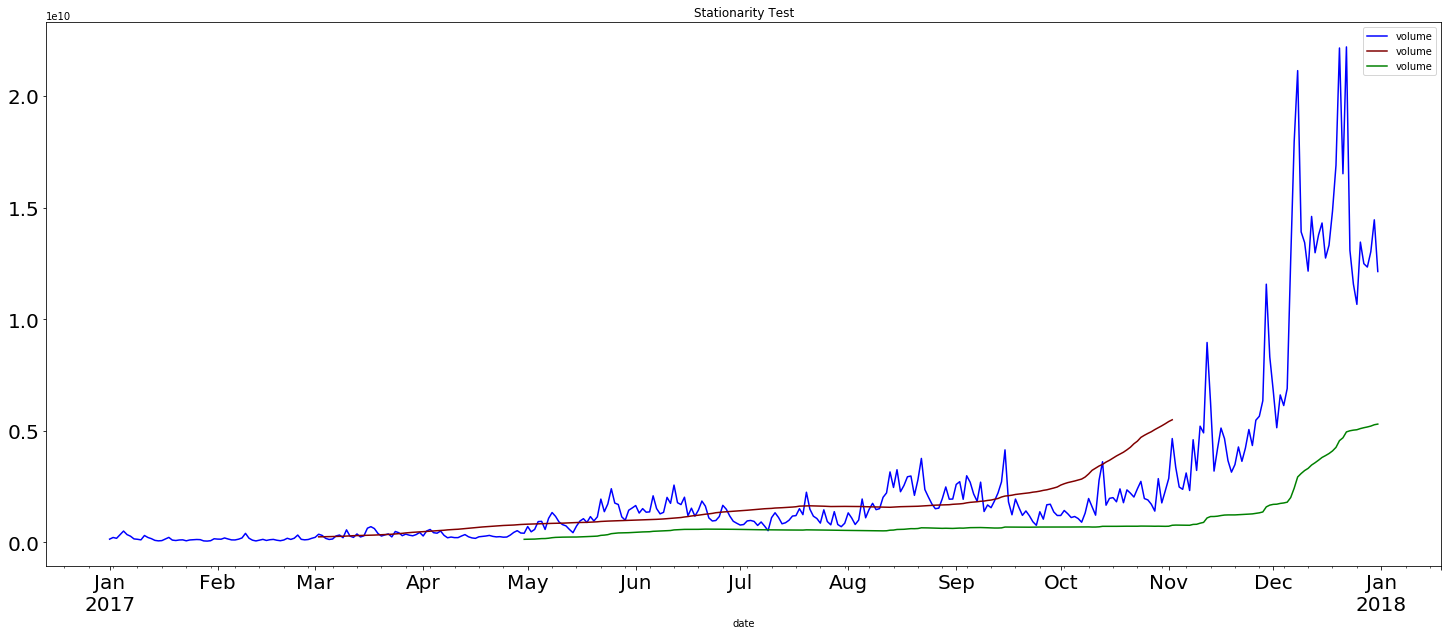

In [117]:
stationarity(Staionary_df)

/Users/carolinahoffmann-becking/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=120,center=False).std()
  """


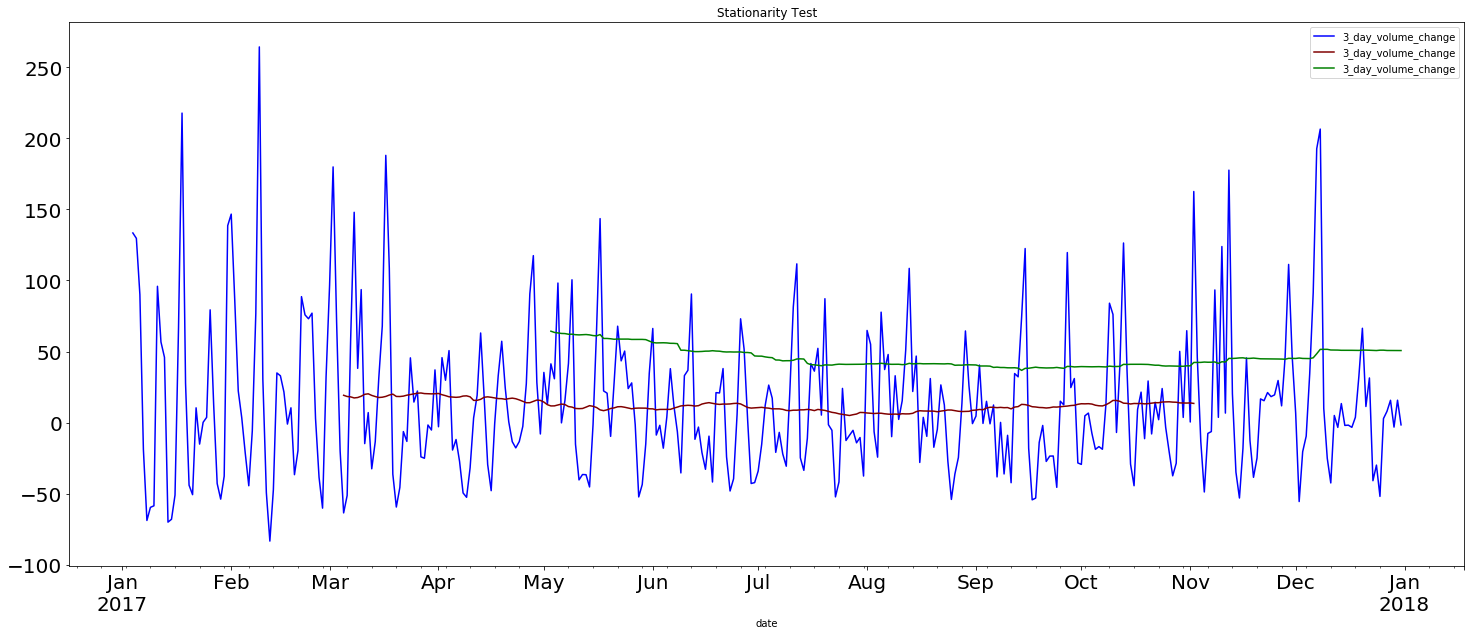

In [118]:
stationarity(Staionary_df2)

**Scientific Alternative - Augmented Dickey-Fuller test**

This test here is a scientific test which starts out by forming the following hypotheses:
Null Hypothesis: That the time series is non-stationary
Alternative Hypothesis: The time series is stationary

How the ADF test works is that it assumes that the time series is non-stationary, and tries to prove so by showing that the null hypothesis is true. After running the test, it returns some statistics that we can use to see whether the null hypothesis can be rejected.
If we reject the Null Hypothesis, then we can assume that our time series is stationary.

In [152]:
Bitcoin_2017_09 = Bitcoin_2017 ['2017-09'] 
Regression_df = Bitcoin_2017_09[['3_day_volume_change','close_ratio']]
Regression_df

,3_day_volume_change,close_ratio
date,,
2017-09-01,4.545308,1.0000
2017-09-02,40.472173,0.2165
2017-09-03,-0.603621,0.5578
2017-09-04,14.937978,0.2647
2017-09-05,-0.887904,0.8806
2017-09-06,12.358330,0.9164
2017-09-07,-38.251884,0.6631
2017-09-08,0.108230,0.2621
2017-09-09,-36.180194,0.5750


In [144]:
#presentation on types of regression 

## Linear Regression
Implication on Machine Learning limitations and importance of Recurrent Neural Networks for time series predicitions including input from current timestep and all previous timesteps [see presentation].

In [161]:
#linear regression
import sklearn
from sklearn.linear_model import LinearRegression

X = np.array(Regression_df['3_day_volume_change']).reshape(30,1) #reshape list in python to vektors since programme wants to work with vektor
Y = np.array(Regression_df['close_ratio']).reshape(30,1)

lm = LinearRegression()
lm = lm.fit(X,Y)

#m = lm.intercept_
#b = lm.coef_
#y_predict = -m*X + b

print("Intercept ", lm.intercept_) #y = m*x + n -- intercept = m
print("Coefficient ", lm.coef_)    # coefficient = n 

Intercept  [0.52211228]
Coefficient  [[0.00040751]]


In [162]:
preds = lm.predict(X)
MSE  = np.mean((Y-preds)**2)
print('MSE: ', MSE)

MSE:  0.09585961962766151


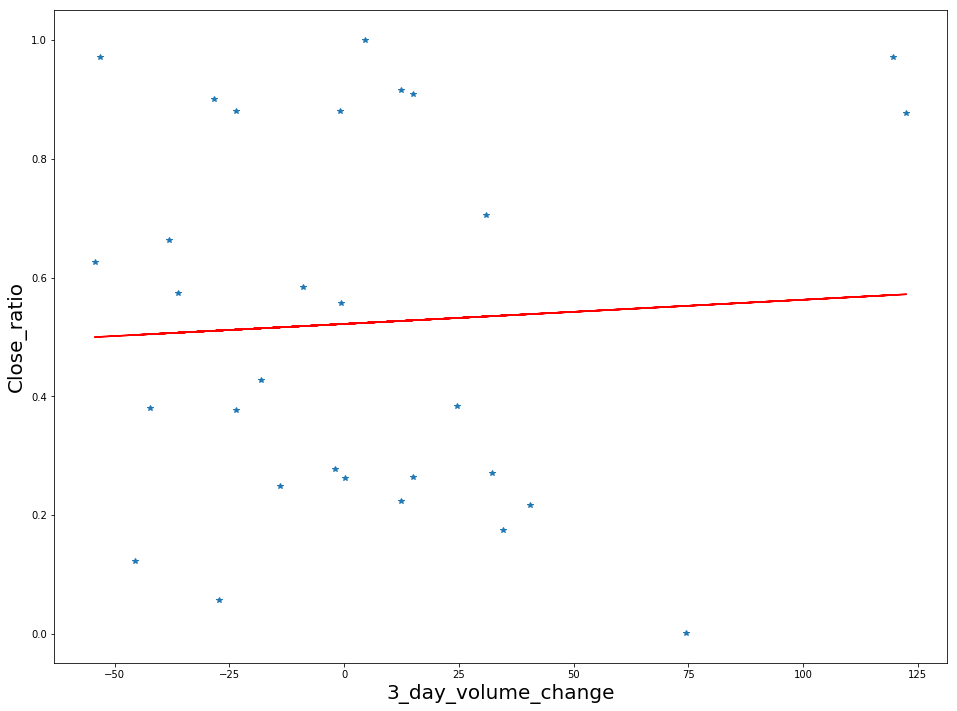

In [163]:
plt.figure(figsize=(16,12))
plt.plot(X,Y,'*')
plt.plot(X,preds,color='r')
plt.xlabel('3_day_volume_change',fontsize=20)
plt.ylabel('Close_ratio',fontsize=20)
plt.show()